tmon [-182.59686382 -167.86452193 -153.28119469 -138.84925153 -124.57119154
 -110.44965557]
nmon [-182.59686382 -167.86452193 -153.28119469 -138.84925153 -124.57119154
 -110.44965557]


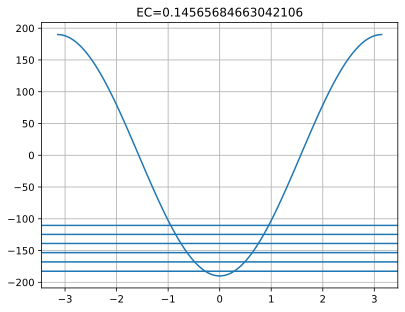

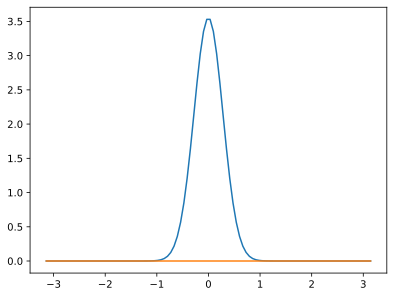

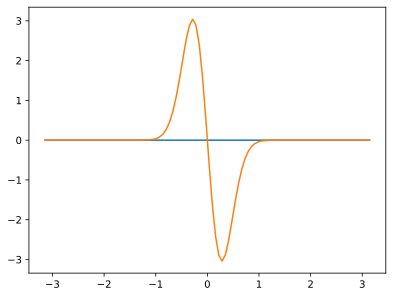

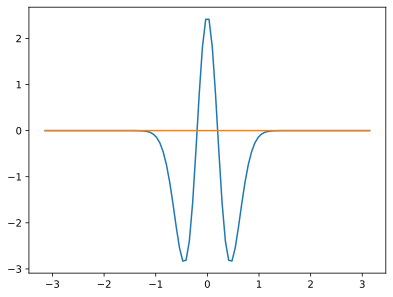

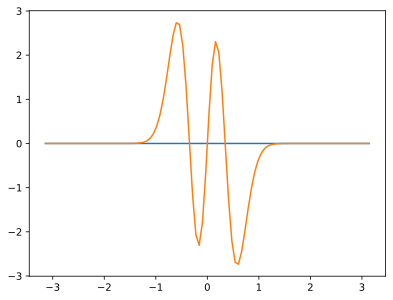

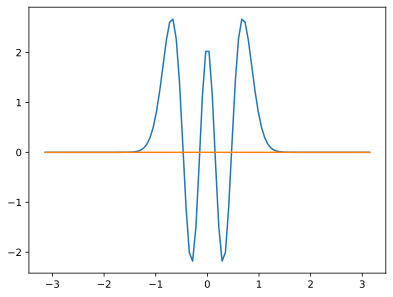

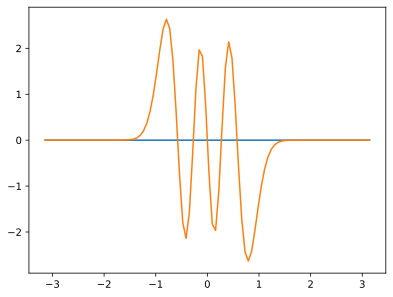

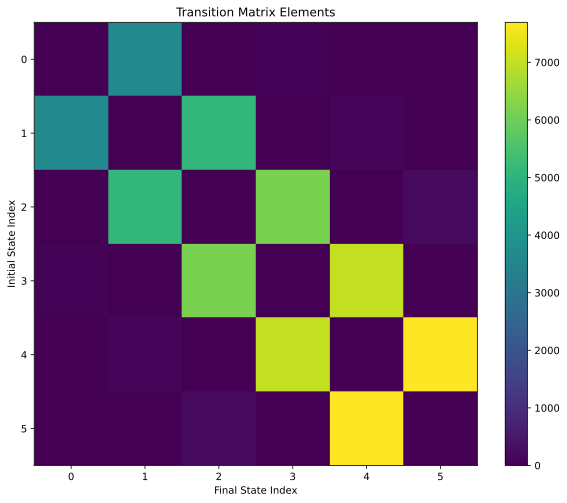

In [1]:
from nmon import *

nmon = Nmon(EJM=90, EJN=100)
nmon.hamiltonian_calc(flux=0, ng=0, make_plot=True)

In [2]:
print("EC", nmon.EC_total)
print("EC shunt", nmon.EC_shunt)
print("total C", nmon.C_total)

print('total L', nmon.L_total)
print('Expected freq', 1/ np.sqrt(nmon.L_total*nmon.C_total)/1e9)

print("EJM", nmon.EJM)
print("EJN", nmon.EJN)
print("ECJM", nmon.ECJM)
print("ECJN", nmon.ECJN)

EC 0.14565684663042106
EC shunt 0.1931783881678237
total C 1.3262568333501023e-13
total L 8.596391459856467e-10
Expected freq 93.65437947420628
EJM 90
EJN 100
ECJM 1.25
ECJN 1.125


In [4]:
m = 1
-(nmon.EJM + nmon.EJN) + np.sqrt(8*nmon.EC_total* ((nmon.EJM + nmon.EJN))) * (m + 1/2) - nmon.EC_total/12*(6*m**2 + 6*m + 3)

-167.86287717777253

In [10]:
from nmon import *

N_EJN = 20
N_EJM = 20
EJM_list = np.linspace(0.1, 15, N_EJN)
EJN_list = np.linspace(0.1, 5, N_EJM)

relative_anharm_list = np.zeros((N_EJM , N_EJN))
w01_list = np.zeros((N_EJM , N_EJN))
w12_list = np.zeros((N_EJM , N_EJN))

for i in tqdm(range(N_EJM)):
    for j in range(N_EJN):
        nmon = Nmon(EJM=EJM_list[i], EJN=EJN_list[j])
        nmon.hamiltonian_calc(flux=0, ng=0)
        relative_anharm_list[i, j] = nmon.relative_anharm
        try:
            w01_list[i, j] = nmon.transition_freqs[0]
            w12_list[i, j] = nmon.transition_freqs[1]
        except Exception as e:
            print(e)
            print(nmon.EC_total, nmon.EJN, nmon.EJM, nmon.transition_freqs, nmon.bound_state_energies)
            print()

  0%|          | 0/20 [00:00<?, ?it/s]

list index out of range
0.19311206802909014 0.1 0.1 [] [-0.02517584281151027]

list index out of range
0.19302661714292244 0.35789473684210527 0.1 [] [-0.11974503745962226]

list index out of range
0.19294124184627562 0.6157894736842106 0.1 [] [-0.2583433622854785]

list index out of range
0.19285594203889472 0.8736842105263158 0.1 [1.093150058058518] [-0.4214758389588912, 0.6716742190996268]



  5%|▌         | 1/20 [00:03<01:07,  3.54s/it]

list index out of range
0.19285246201613573 0.1 0.8842105263157894 [1.0980344385764158] [-0.4284886083823994, 0.6695458301940165]



100%|██████████| 20/20 [01:09<00:00,  3.48s/it]


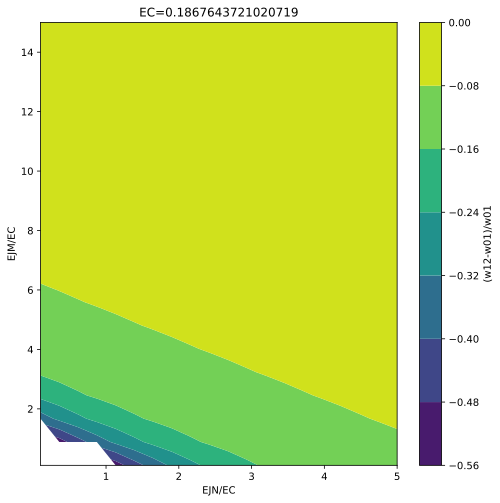

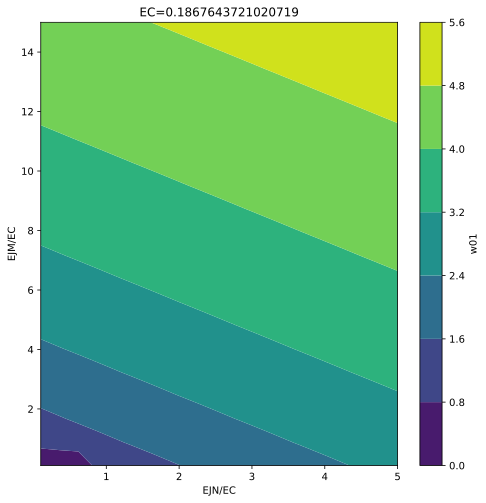

In [13]:
plt.figure(figsize=(8, 8))
# plt.imshow(relative_anharm_list, cmap='viridis', interpolation='nearest')

EJN_grid, EJM_grid = np.meshgrid(EJN_list, EJM_list)

plt.contourf(EJN_grid, EJM_grid, relative_anharm_list)
plt.colorbar(label='(w12-w01)/w01')
plt.xlabel('EJN/EC')
plt.ylabel('EJM/EC')
plt.title("EC={}".format(nmon.EC_total))
# plt.xticks(ticks=np.arange(len(EJM_list[::]))[::2], labels=[f'{round(i/nmon.EC_total,1)}' for i in EJM_list[::2]])
# plt.yticks(ticks=np.arange(len(EJN_list[::]))[::2], labels=[f'{round(i/nmon.EC_total,1)}' for i in EJN_list[::2]])
plt.show()

plt.figure(figsize=(8, 8))
plt.contourf(EJN_grid, EJM_grid,w01_list)
plt.colorbar(label='w01')
plt.xlabel('EJN/EC')
plt.ylabel('EJM/EC')
plt.title("EC={}".format(nmon.EC_total))
# plt.xticks(ticks=np.arange(len(EJM_list[::]))[::2], labels=[f'{round(i/nmon.EC_total,1)}' for i in EJM_list[::2]])
# plt.yticks(ticks=np.arange(len(EJN_list[::]))[::2], labels=[f'{round(i/nmon.EC_total,1)}' for i in EJN_list[::2]])
plt.show()

In [3]:
nmon.nmon_circ.sym_hamiltonian(float_round=4)

<IPython.core.display.Latex object>

In [4]:
# nmon.nmon_circ.var_categories

In [5]:
# nmon.nmon_circ.variable_transformation()

In [6]:
# nmon.nmon_circ.cutoff_names

In [7]:
system_hierarchy = [[1, 2, 3, 4]]
scq.truncation_template(system_hierarchy)

[6]

In [8]:

nmon.nmon_circ.cutoff_n_1 = 5
nmon.nmon_circ.cutoff_n_2 = 5
nmon.nmon_circ.cutoff_n_3 = 5
nmon.nmon_circ.cutoff_n_4 = 5
nmon.nmon_circ.configure(system_hierarchy=system_hierarchy, subsystem_trunc_dims=[6])
nmon.nmon_circ.sym_hamiltonian(subsystem_index=0, float_round=4)  # show Hamiltonian for subsystem 0

<IPython.core.display.Latex object>

In [9]:
nmon.ECM, nmon.ECN

(154.54271053425893, 22.07753007632271)

In [10]:
nmon.nmon_circ.Φ1 = 0
nmon.nmon_circ.ng1 = 0.0
nmon.nmon_circ.ng2 = 0.0
nmon.nmon_circ.ng3 = 0.0
nmon.nmon_circ.ng4 = 0.0
nmon.nmon_circ.hamiltonian().toarray()

array([[-443.8746535 +0.j,    0.        +0.j,    0.        +0.j,
           0.        +0.j,    0.        +0.j,    0.        +0.j],
       [   0.        +0.j, -414.61660498+0.j,    0.        +0.j,
           0.        +0.j,    0.        +0.j,    0.        +0.j],
       [   0.        +0.j,    0.        +0.j, -413.74156617+0.j,
           0.        +0.j,    0.        +0.j,    0.        +0.j],
       [   0.        +0.j,    0.        +0.j,    0.        +0.j,
        -412.16156878+0.j,    0.        +0.j,    0.        +0.j],
       [   0.        +0.j,    0.        +0.j,    0.        +0.j,
           0.        +0.j, -411.17572094+0.j,    0.        +0.j],
       [   0.        +0.j,    0.        +0.j,    0.        +0.j,
           0.        +0.j,    0.        +0.j, -385.70761681+0.j]])

In [11]:
import numpy as np
Matr = nmon.nmon_circ.transformation_matrix
Matr_inv = np.linalg.inv(Matr)

main_node = 1
M_nodes = np.arange(nmon.N+1, nmon.M+nmon.N) # should be sorted
N_nodes = np.arange(main_node+1, nmon.N+1) # should be sorted

solution_coefs = np.zeros(nmon.N + nmon.M) # coefs for phi_i for i from 0 to M+N-1

solution_coefs[1] = nmon.N*nmon.M

for position, node_num in enumerate(M_nodes):
    solution_coefs[node_num] = nmon.N * (position + 1)

for position, node_num in enumerate(N_nodes):
    solution_coefs[node_num] = nmon.M * (position + 1)

theta_coefs = Matr_inv@solution_coefs[1:] # theta coefs
theta_coefs # theta = theta_coef * phi

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [ ]:
evals = nmon.nmon_circ.subsystems[0].eigenvals()
evals

array([-443.8746535 , -414.61660498, -413.74156617, -412.16156878,
       -411.17572094, -385.70761681])

In [ ]:
evals[1] - evals[0]

29.25804852240651

100%|██████████| 100/100 [00:00<00:00, 603.94it/s]


bound_states [-443.8746535044198, -414.6166049820133, -413.7415661731859, -412.16156877969036, -411.1757209410804, -385.7076168129671]


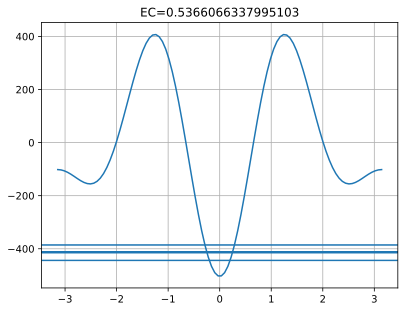

In [ ]:
from tqdm import tqdm

left_phi = -np.pi
right_phi = np.pi
N_phi = 100

phi_list = np.linspace(left_phi, right_phi, N_phi)


potential_list = np.zeros_like(phi_list)
for i, phi in enumerate(tqdm(phi_list)):
    potential_list[i] = nmon.nmon_circ.potential_energy(θ1=phi*theta_coefs[0], θ2=phi*theta_coefs[1], θ3 = phi*theta_coefs[2], θ4 = phi*theta_coefs[3])

max_pot = max(potential_list)
bound_state_energies = []
for i, eval in enumerate(evals):
    if eval > max_pot:
        break
    bound_state_energies.append(eval)
    
print("bound_states", bound_state_energies)

shifted_evals = evals #+ 2*np.abs(np.min(evals))
shifted_potential_list = potential_list# - min(potential_list)

plt.plot(phi_list, shifted_potential_list)

for eval in shifted_evals:
    plt.axhline(eval)

plt.grid(which='both')
plt.title("EC={}".format(nmon.EC))
# plt.ylim(-10, 10)
plt.show()


### ng_i = 0

array([-0.36214846, 25.84643732, 25.85396235, 56.47143513, 56.54200109,
       56.8713993 ])

### ng_i = 0.1

array([20.75739312, 44.32802434, 49.5537639 , 66.65151554, 69.30862632,
       86.52642943])

In [ ]:
# nmon.nmon_circ.eigenvals()

### for cutoff = 10 # for EC = 1e-13
array([-1.24594943,  0.45019041,  0.7315435 ,  5.00785916,  5.00956115,
       12.45906783])

### for cutoff = 5 # 1.6 s -> no need to use trunc, ham shape: (14641, 14641)

array([-1.24594943,  0.45019041,  0.7315435 ,  5.00785916,  5.00956116,
       12.45906908])

### for cutoff = 4
array([-1.24594943,  0.45019042,  0.73154351,  5.00786203,  5.00956403,
       12.46053188])


### for cutoff = 5, trunc = 2 # 2.5 s
array([-1.24594943,  0.45019041,  0.7315435 ,  5.00785916,  5.00956116,
       12.45906908]) # somehow, this is for subsystems[0].eigenvals() (which got trunc=2)
       
Hamiltonian, meanwhile is:

       [-1.24594943+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.45019041+0.j]

In [ ]:
nmon.nmon_circ.offset_charge_transformation()

<IPython.core.display.Latex object>

In [ ]:
nmon.nmon_circ.sym_external_fluxes()

{Φ1: (Branch(JJ, 1, 4, id_str: 6),
  [Branch(JJ, 2, 0, id_str: 2),
   Branch(JJ, 1, 2, id_str: 3),
   Branch(JJ, 1, 4, id_str: 6),
   Branch(JJ, 4, 3, id_str: 5),
   Branch(JJ, 3, 0, id_str: 4)])}

In [ ]:
nmon.nmon_circ.branches

[Branch(C, 1, 0, id_str: 0),
 Branch(C, 1, 0, id_str: 1),
 Branch(JJ, 2, 0, id_str: 2),
 Branch(JJ, 1, 2, id_str: 3),
 Branch(JJ, 3, 0, id_str: 4),
 Branch(JJ, 4, 3, id_str: 5),
 Branch(JJ, 1, 4, id_str: 6)]

In [ ]:
nmon.nmon_circ.potential_symbolic

-100.5*cos(θ1 + θ3) - 100.5*cos(θ2 - θ3) - 100.9*cos(θ4) - 100.9*cos(Φ1 - θ2) - 100.9*cos(θ1 + θ4)

In [ ]:
import numpy as np
# nmon.nmon_circ.subsystems[0].plot_evals_vs_paramvals("Φ1", np.linspace(0,1,21), num_cpus=4);

In [ ]:
# nmon.nmon_circ.subsystems[0].plot_wavefunction(which=0, var_indices=(2,), mode="abs-sqr")

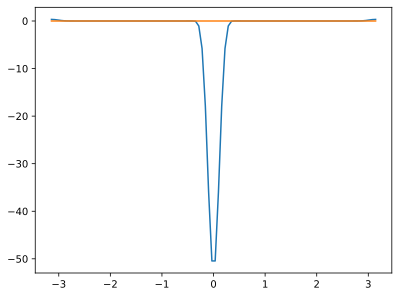

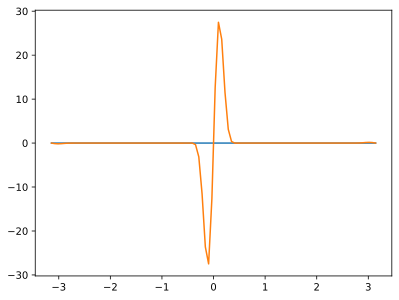

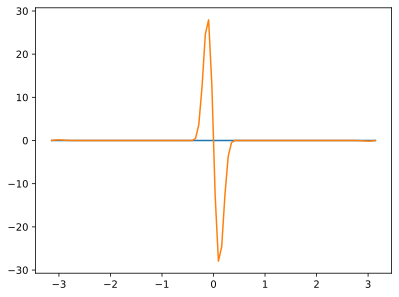

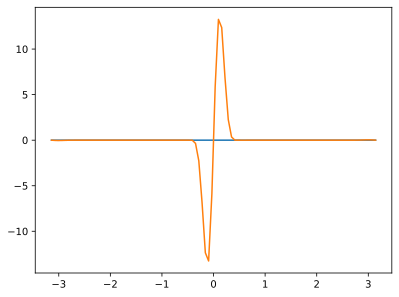

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py: 1272

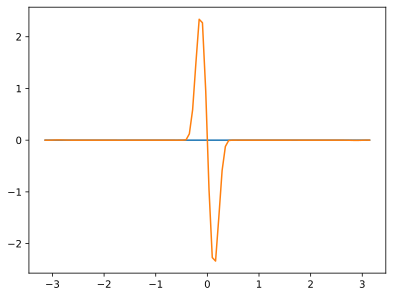

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py: 1272

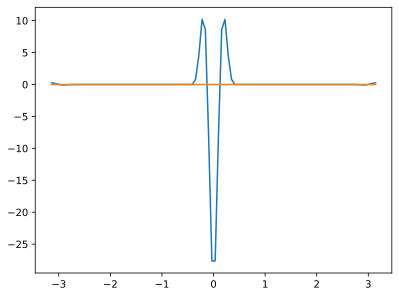

In [ ]:


theta_grids = [scq.core.discretization.Grid1d(left_phi*theta_coefs[i], right_phi*theta_coefs[i], N_phi) for i in range(nmon.N + nmon.M - 1)]
wavefunctions = []
for i in range(len(bound_state_energies)):
    try:
        full_wf = nmon.nmon_circ.generate_wf_plot_data(which=i, var_indices=(1, 2, 3, 4), \
                                                                    grids_dict={1 : theta_grids[0], 2 : theta_grids[1],\
                                                                                3 : theta_grids[2], 4 : theta_grids[3]}, mode='real')
    except Exception:
        full_wf = nmon.nmon_circ.subsystems[0].generate_wf_plot_data(which=i, var_indices=(1, 2, 3, 4), \
                                                                    grids_dict={1 : theta_grids[0], 2 : theta_grids[1],\
                                                                                3 : theta_grids[2], 4 : theta_grids[3]}, mode='real')
    full_wf = np.einsum('iiii->i', full_wf)

    try:
        imag_full_wf = nmon.nmon_circ.generate_wf_plot_data(which=i, var_indices=(1, 2, 3, 4), \
                                                                     grids_dict={1 : theta_grids[0], 2 : theta_grids[1],\
                                                                                 3 : theta_grids[2], 4 : theta_grids[3]}, mode='imag')
    except Exception:
        imag_full_wf = nmon.nmon_circ.subsystems[0].generate_wf_plot_data(which=i, var_indices=(1, 2, 3, 4), \
                                                                     grids_dict={1 : theta_grids[0], 2 : theta_grids[1],\
                                                                                 3 : theta_grids[2], 4 : theta_grids[3]}, mode='imag')
    imag_full_wf = np.einsum('iiii->i', imag_full_wf)

    wavefunctions.append(full_wf+ 1j*imag_full_wf)
    plt.plot(phi_list, full_wf)
    plt.plot(phi_list, imag_full_wf)
    plt.show()

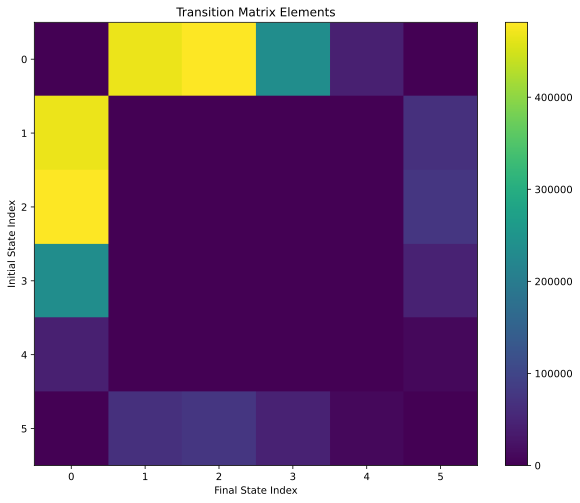

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Assume theta_grids and nmon are properly defined earlier in your context
# For each wavefunction index i from 0 to 3 (first four wavefunctions)
transition_matrix = np.zeros((len(bound_state_energies), len(bound_state_energies)), dtype=np.complex128)  # Initialize the transition matrix

for i in range(len(bound_state_energies)):  # Iterate over the initial state indices
    for j in range(len(bound_state_energies)):  # Iterate over the final state indices
        # Generate the wavefunction data for the j-th final state
        # Compute the matrix element for the transition i -> j
        transition_matrix[i, j] = np.sum(wavefunctions[i].conj() * \
                                         (nmon.M*nmon.EJM*np.sin(nmon.N*phi_list) + \
                                          nmon.N*nmon.EJN*np.sin(nmon.M*phi_list))*\
                                         wavefunctions[j])

# Plotting the matrix of transition elements
plt.figure(figsize=(10, 8))
plt.imshow(np.absolute(transition_matrix), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Transition Matrix Elements')
plt.xlabel('Final State Index')
plt.ylabel('Initial State Index')
# plt.xticks(ticks=np.arange(4), labels=[f'{i}' for i in range(4)])
# plt.yticks(ticks=np.arange(4), labels=[f'{i}' for i in range(4)])
plt.show()


In [ ]:
import numpy as np

# print("Transition Matrix:\n", np.abs(transition_matrix))

def find_dominating_transitions(matrix):
    n = matrix.shape[0]  # Number of states
    current_state = 0  # Start from state 0
    transitions = []
    # We will look for a maximum of n-1 transitions to avoid an infinite loop
    for _ in range(n - 1):
        # Find the index of the maximum element in the current row (dominating transition)
        next_state = (current_state+1)+np.argmax(matrix[current_state][current_state+1:])
        if next_state < n and \
              matrix[current_state, next_state] >= 10*matrix[current_state, current_state]:
            # Store the transition and its value
            transitions.append((current_state, next_state, matrix[current_state, next_state]))
            # Move to the next state
            current_state = next_state

        if next_state == n-1:
            break
    return transitions

# Find and print the dominating transitions starting from state 0
dominating_transitions = find_dominating_transitions(np.absolute(transition_matrix))
for i, transition in enumerate(dominating_transitions):
    print(f"Transition from state {transition[0]} to state {transition[1]} with probability {transition[2]:.2f}")
    print("w{}{}".format(i, i+1), bound_state_energies[transition[1]] - bound_state_energies[transition[0]])

if len(dominating_transitions) > 1:
    print("w12 - w01", (bound_state_energies[dominating_transitions[1][1]] - bound_state_energies[dominating_transitions[1][0]]) - (bound_state_energies[dominating_transitions[0][1]] - bound_state_energies[dominating_transitions[0][0]]))


Transition from state 0 to state 2 with probability 481385.90
w01 30.133087331233924
Transition from state 2 to state 5 with probability 76482.47
w12 28.0339493602188
w12 - w01 -2.099137971015125
